In [11]:
print("🔁 Restarting kernel...")
get_ipython().kernel.do_shutdown(True)

🔁 Restarting kernel...


{'status': 'ok', 'restart': True}

In [1]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5
Setup complete. Using torch 1.12.1+cu113 (Tesla T4)


In [2]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [4]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/dataset"

In [5]:


from roboflow import Roboflow
rf = Roboflow(api_key="EOp9Aah6u6zBhpHVITph")
project = rf.workspace("new-workspace-mhucu").project("street-object")
dataset = project.version(3).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/dataset/street-object-3 in yolov5pytorch:: 100%|██████████| 6368/6368 [00:01<00:00, 5828.45it/s]


In [6]:
!python train.py --img 320 --batch 12 --epochs 140 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/dataset/street-object-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=140, batch_size=12, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-178-g799e3d0 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_

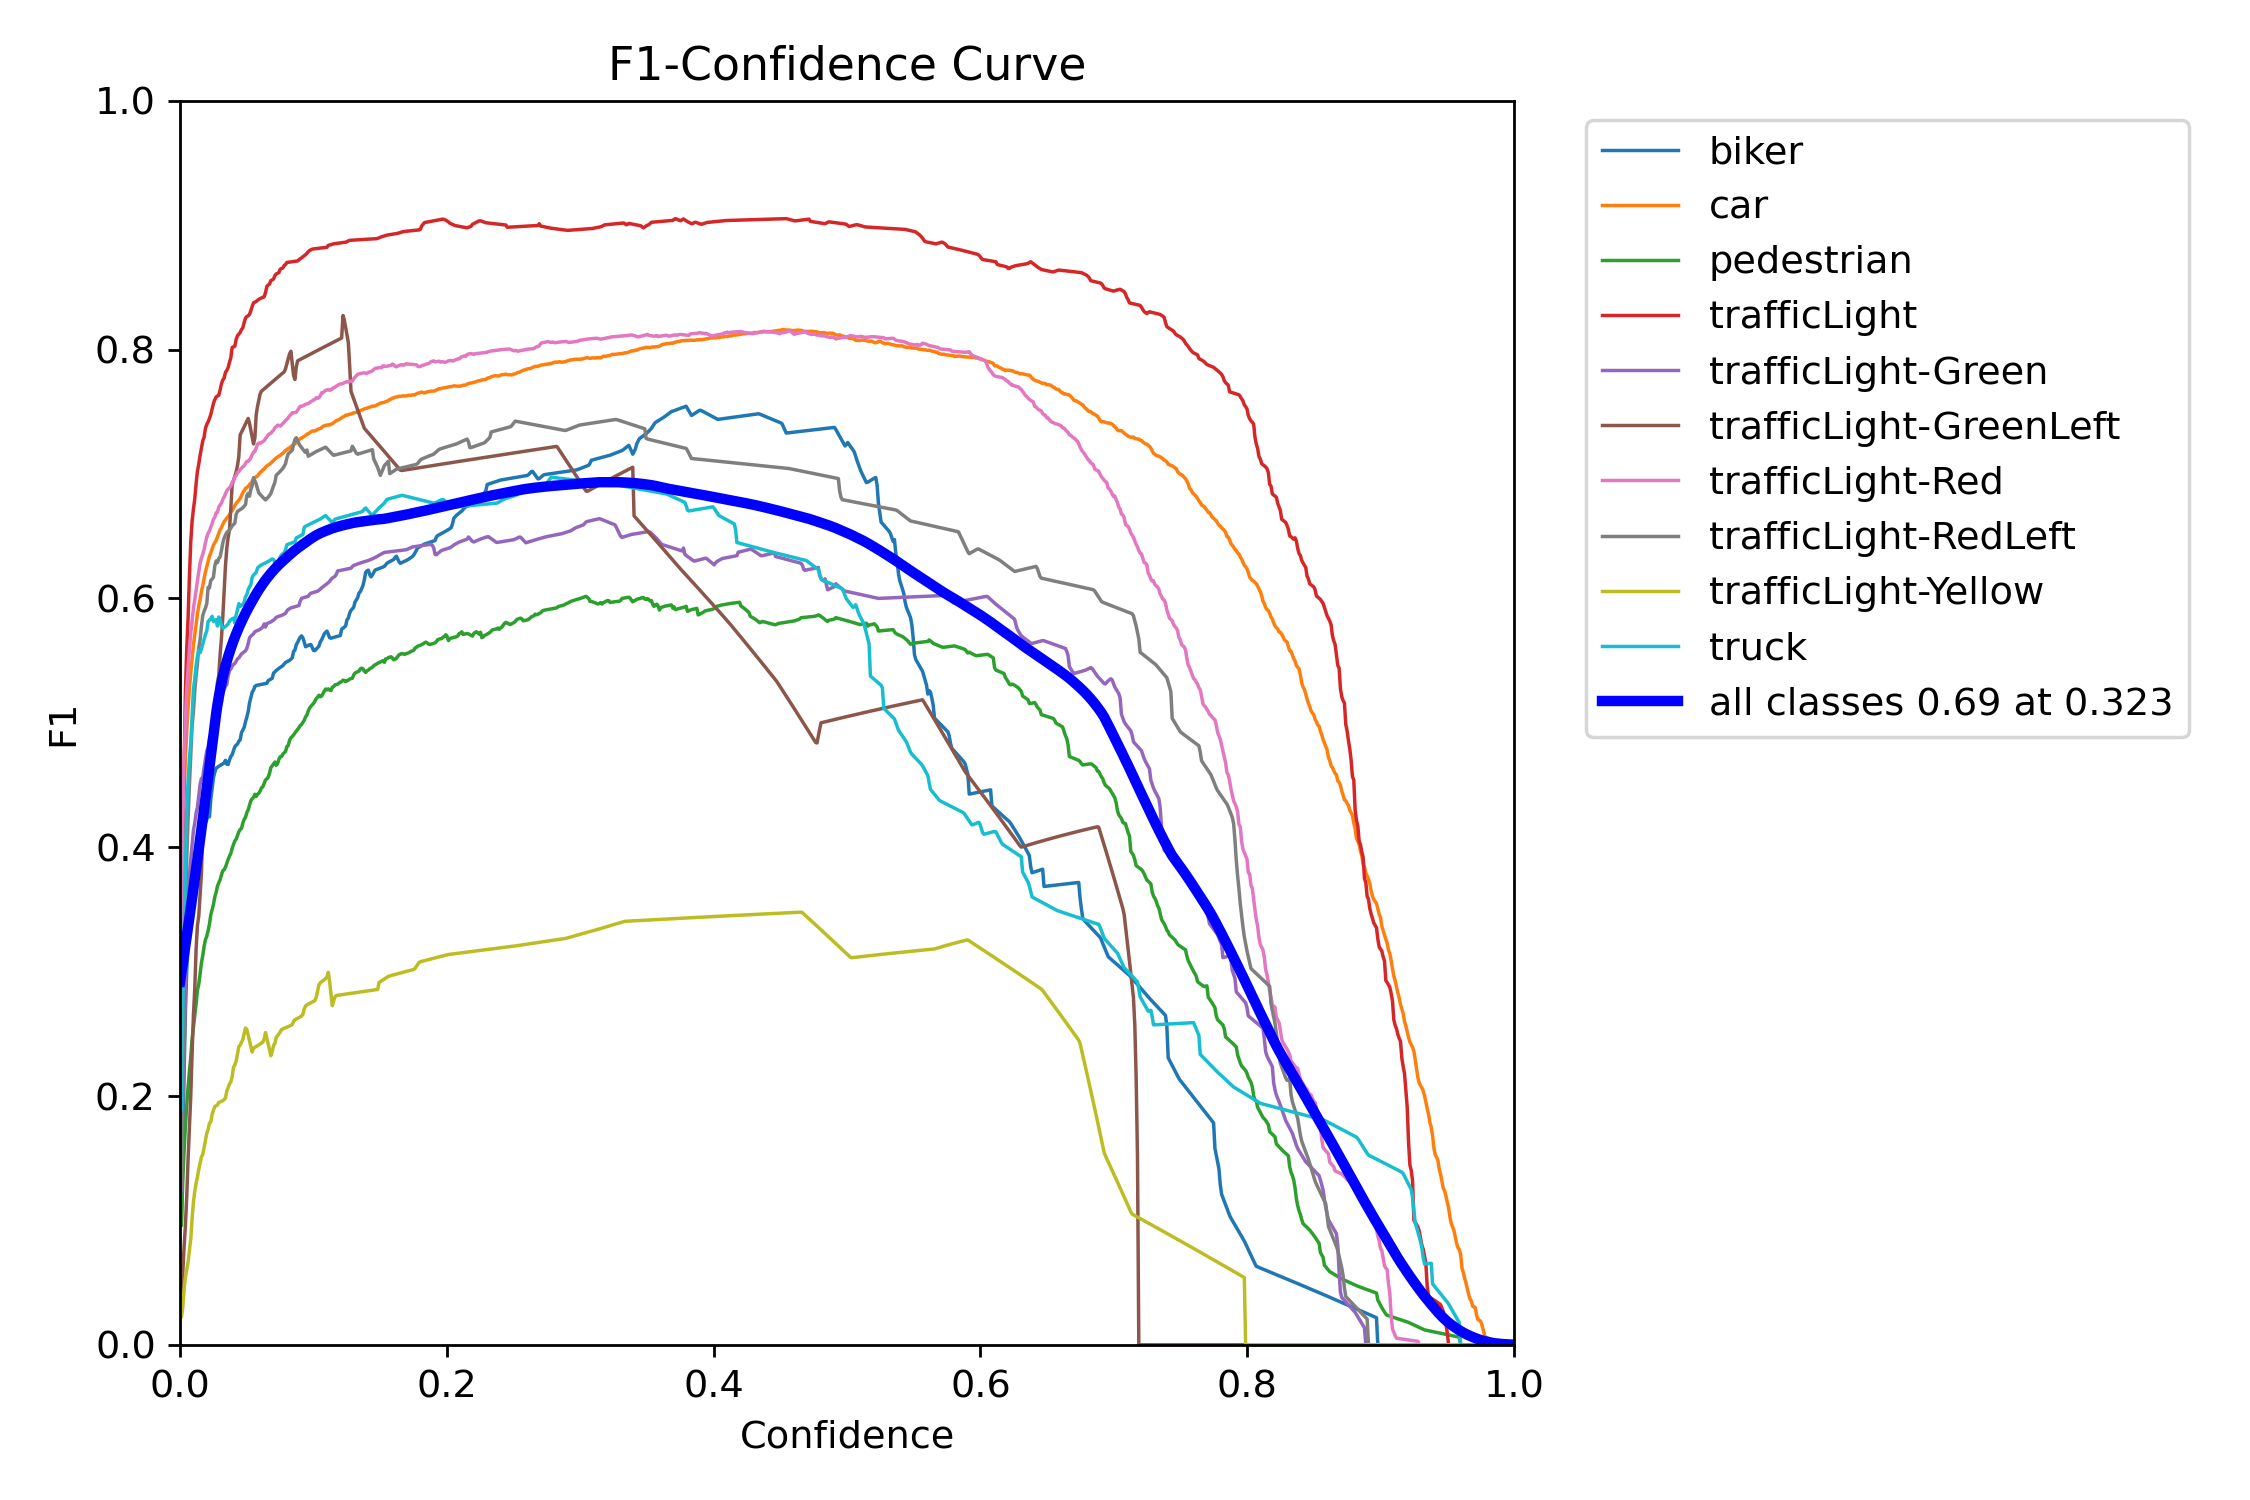

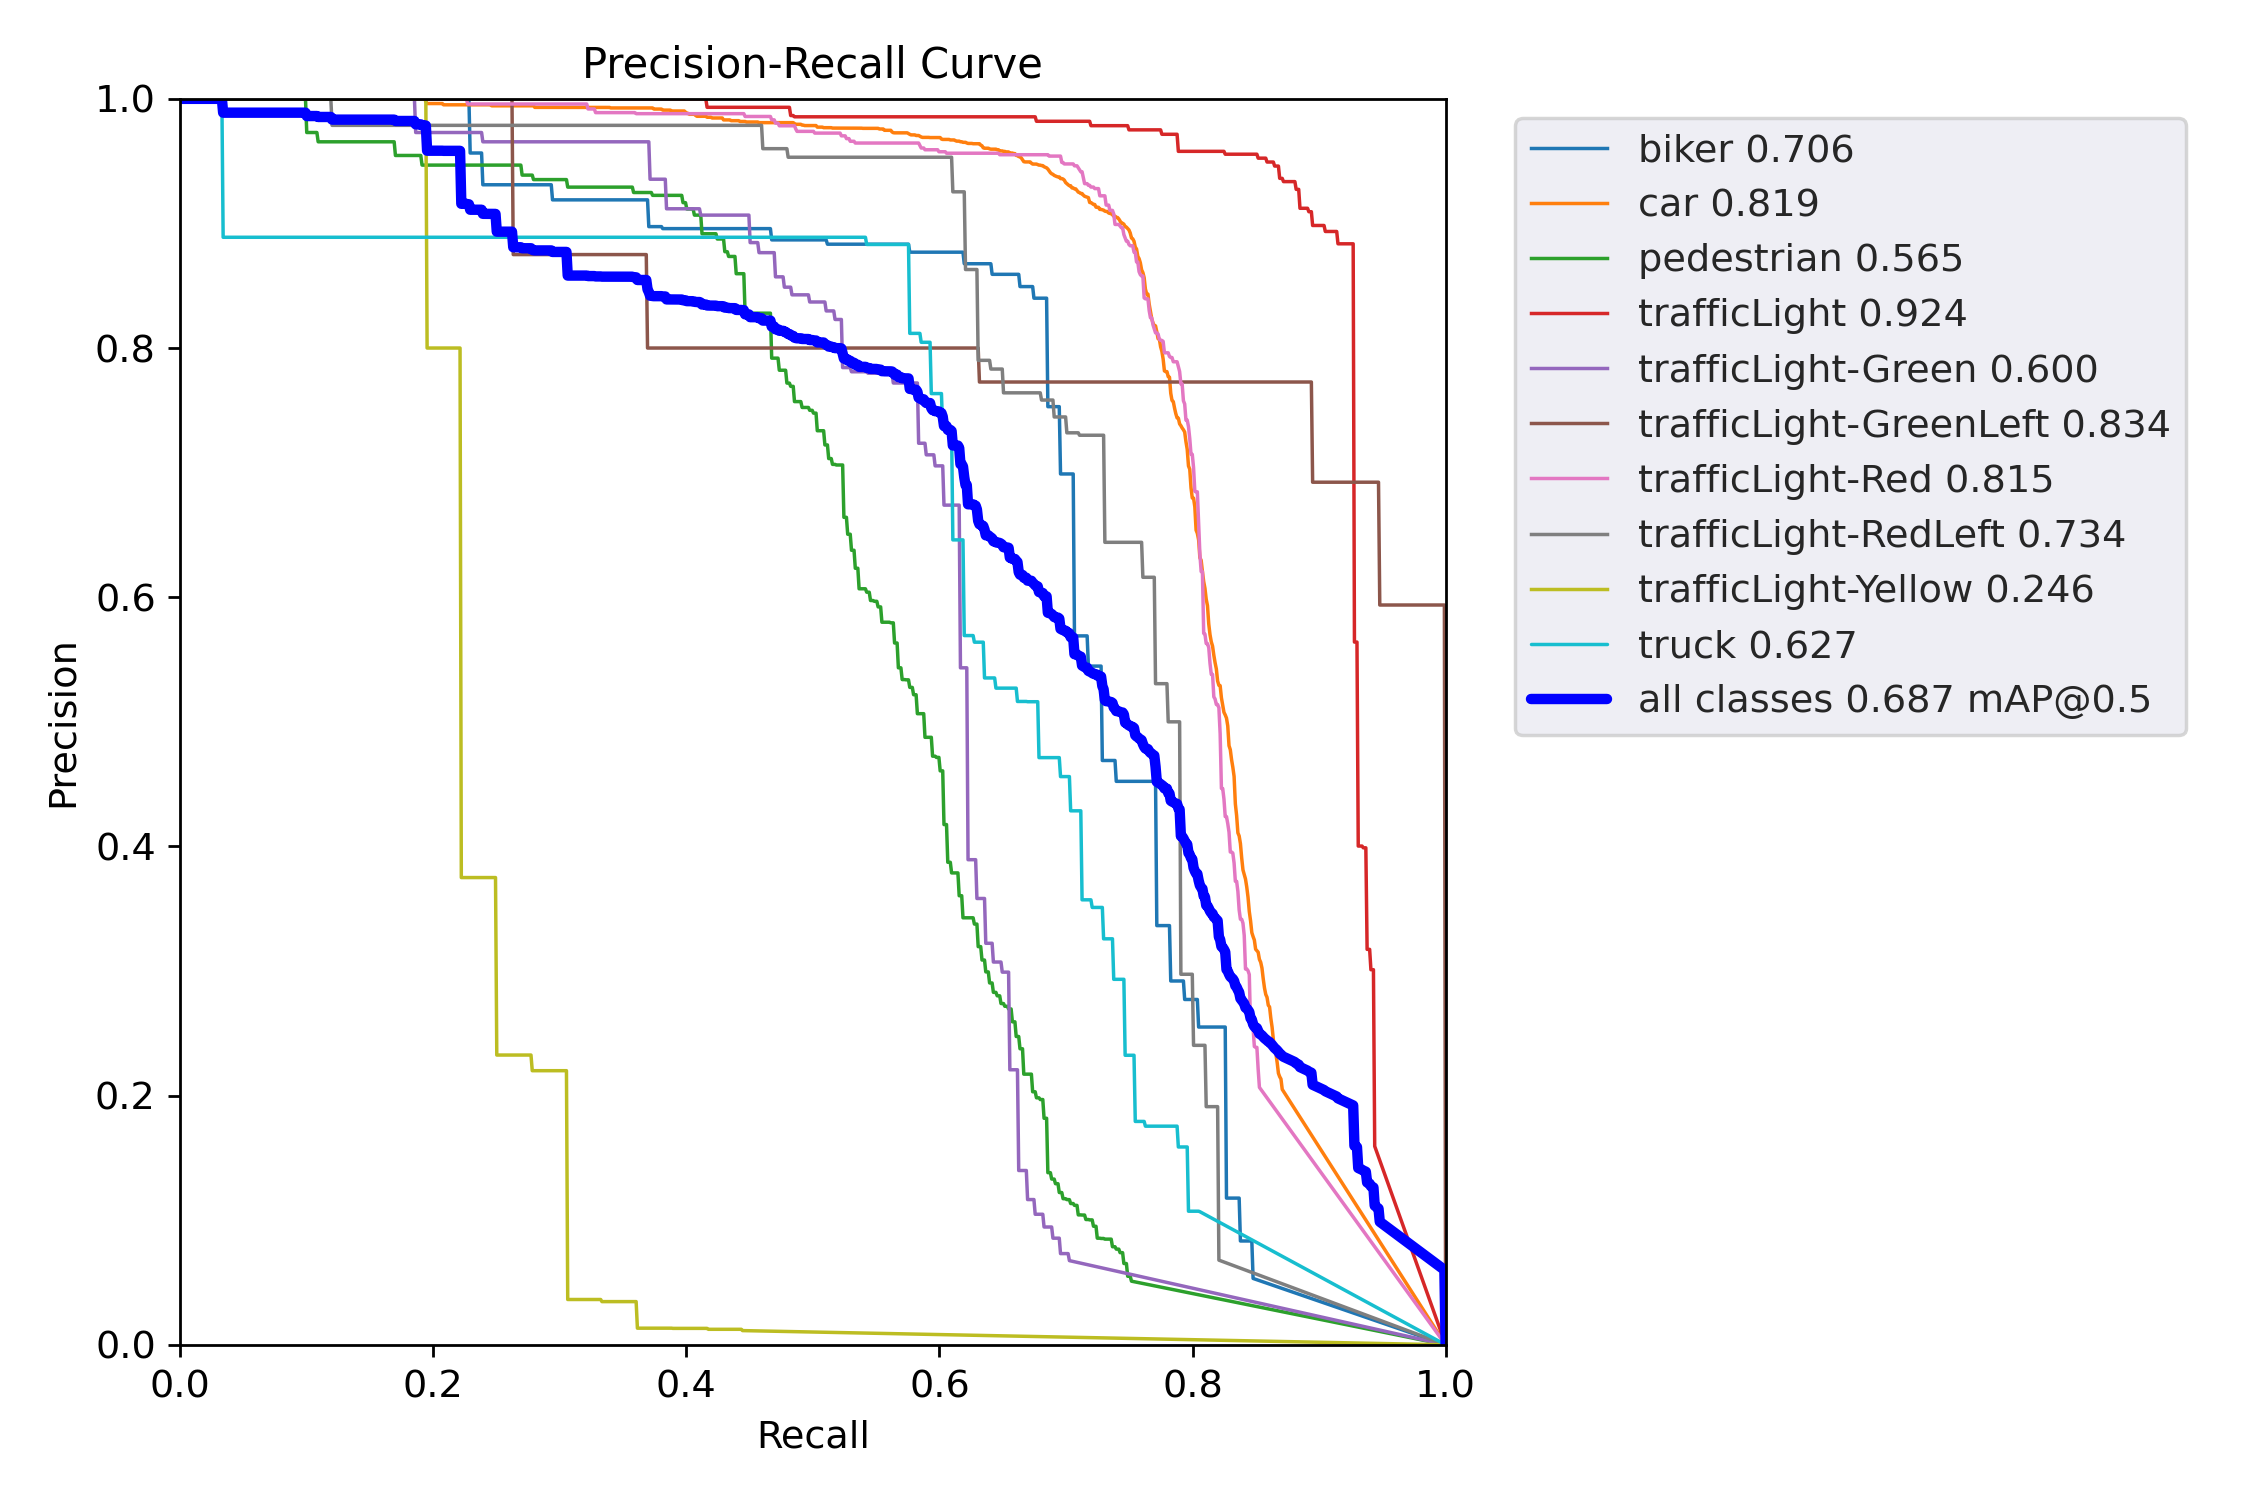

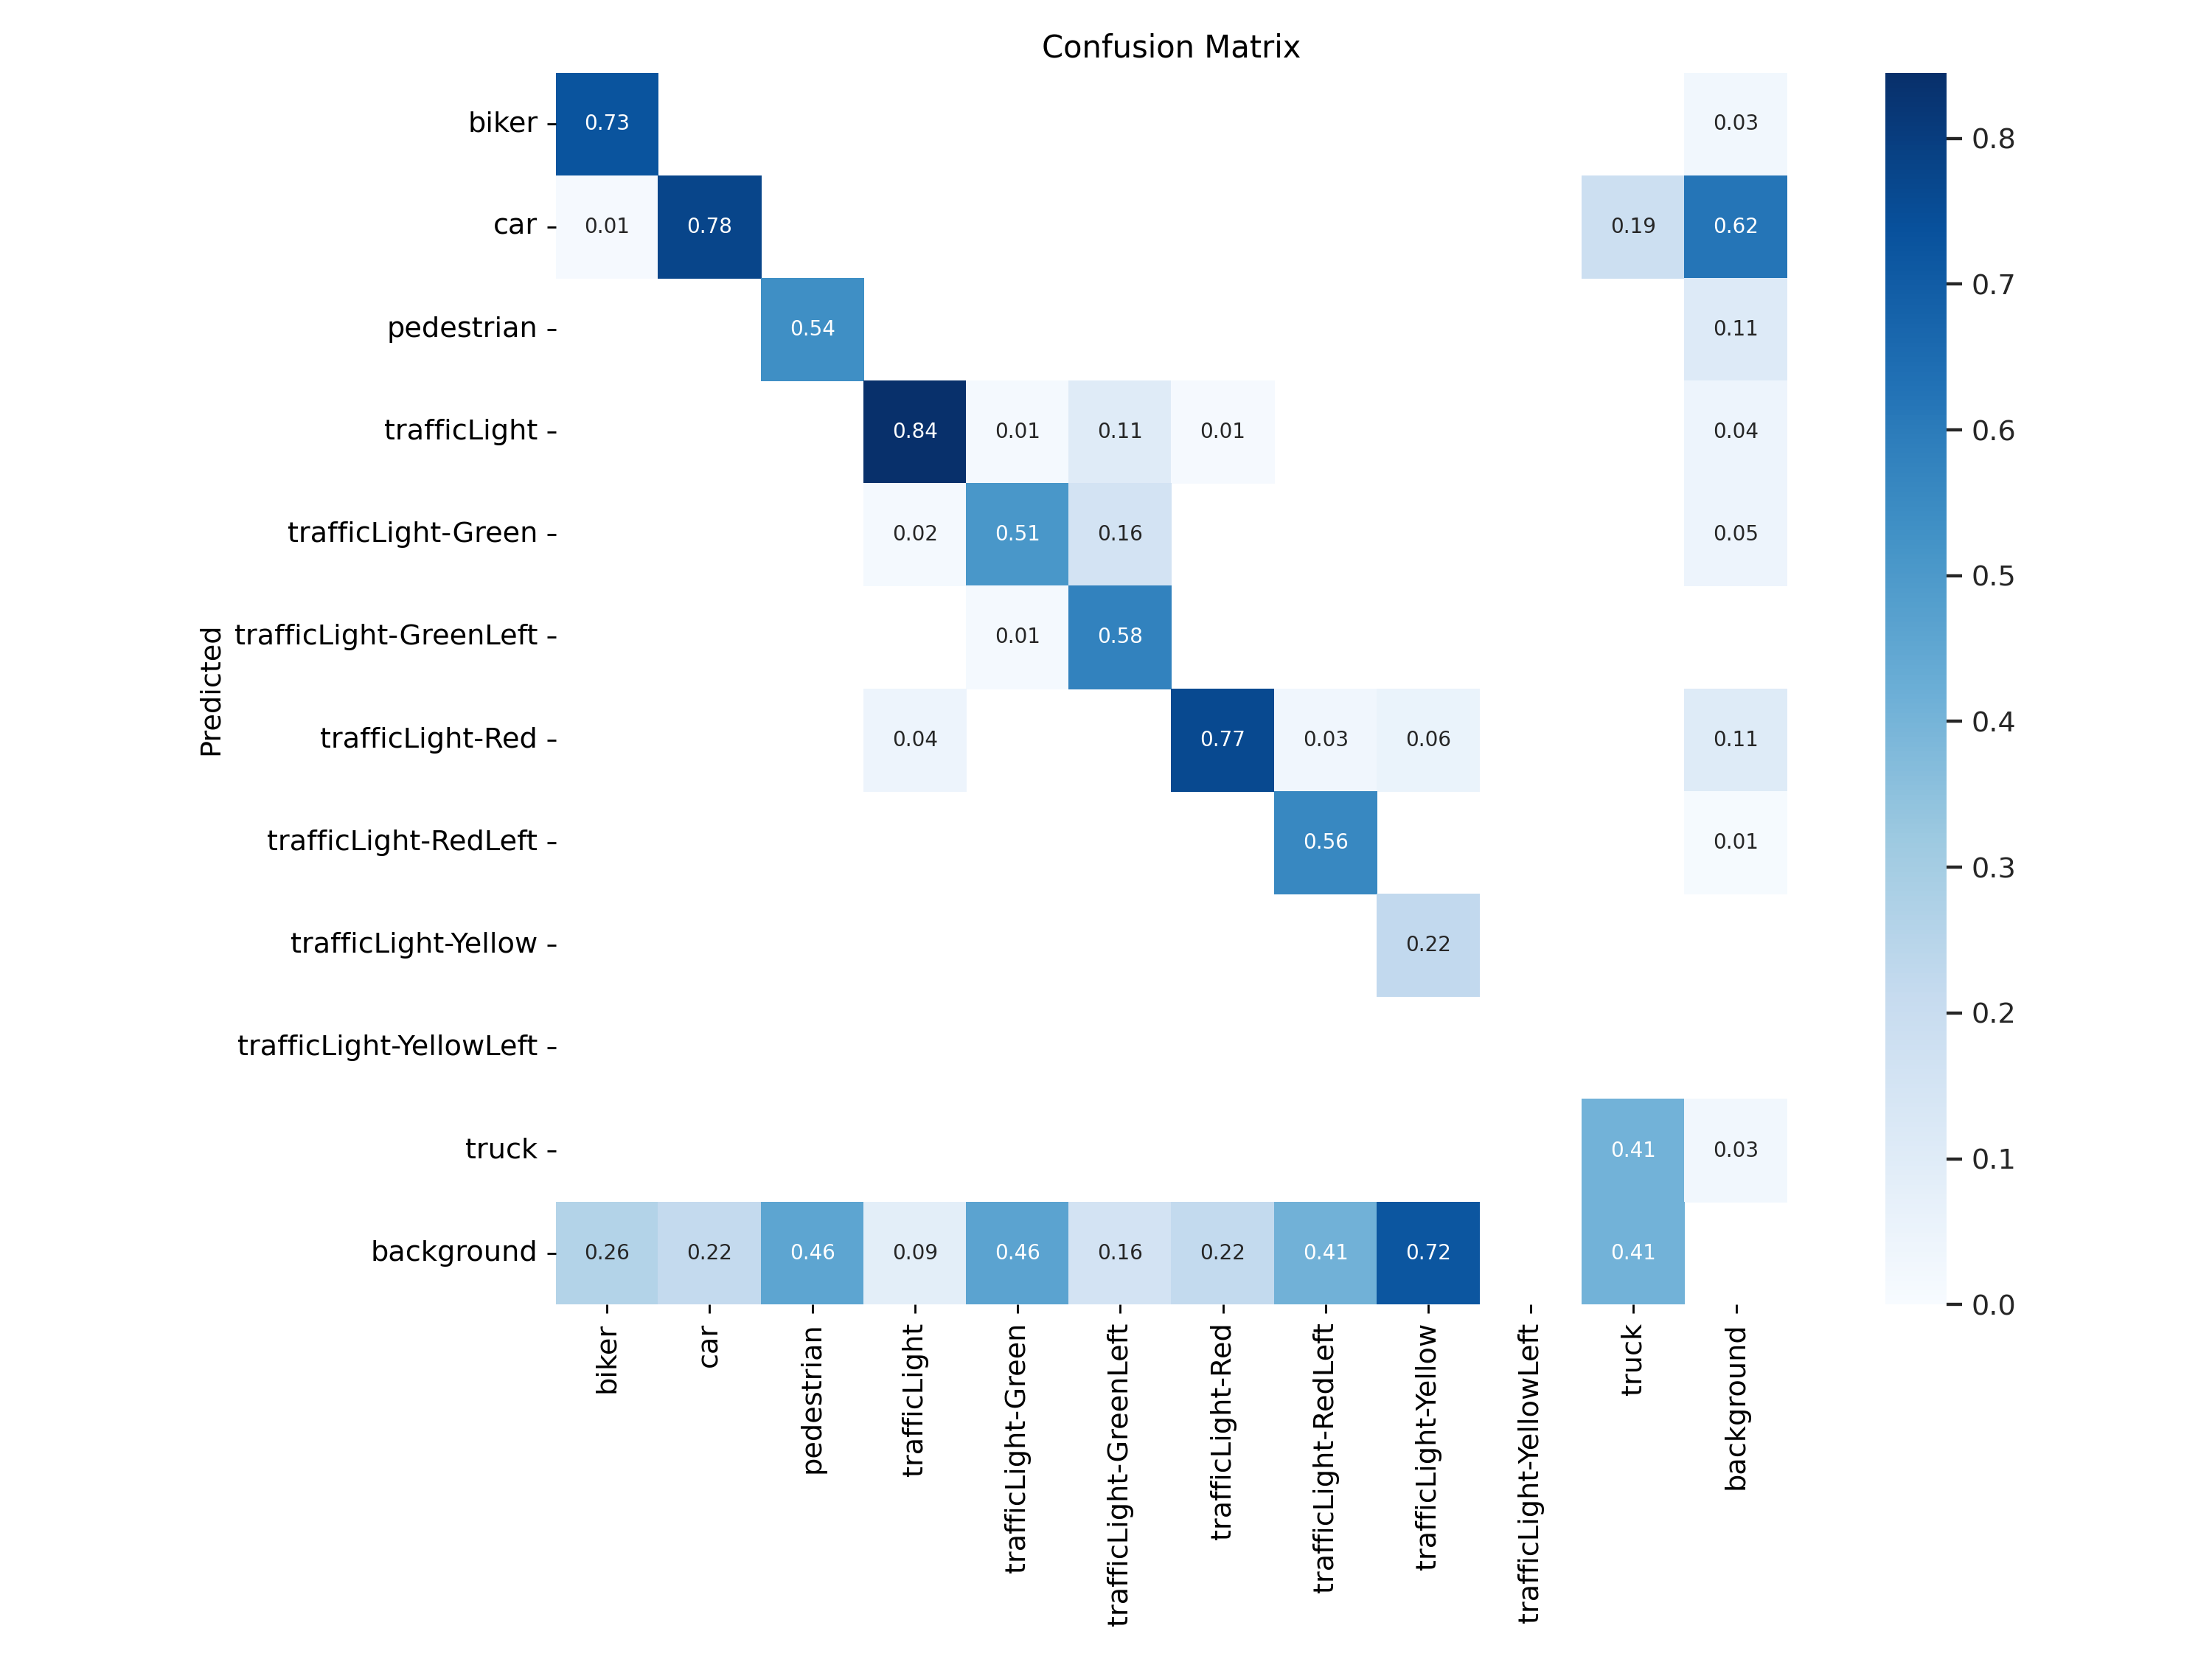

In [23]:
from IPython.display import Image
display(Image("/content/yolov5/runs/train/exp2/F1_curve.png", width=400, height=400))
display(Image("/content/yolov5/runs/train/exp2/PR_curve.png", width=400, height=400))
display(Image("/content/yolov5/runs/train/exp2/confusion_matrix.png", width=500, height=500))


In [ ]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 320 --conf 0.1 --source {dataset.location}/test/images

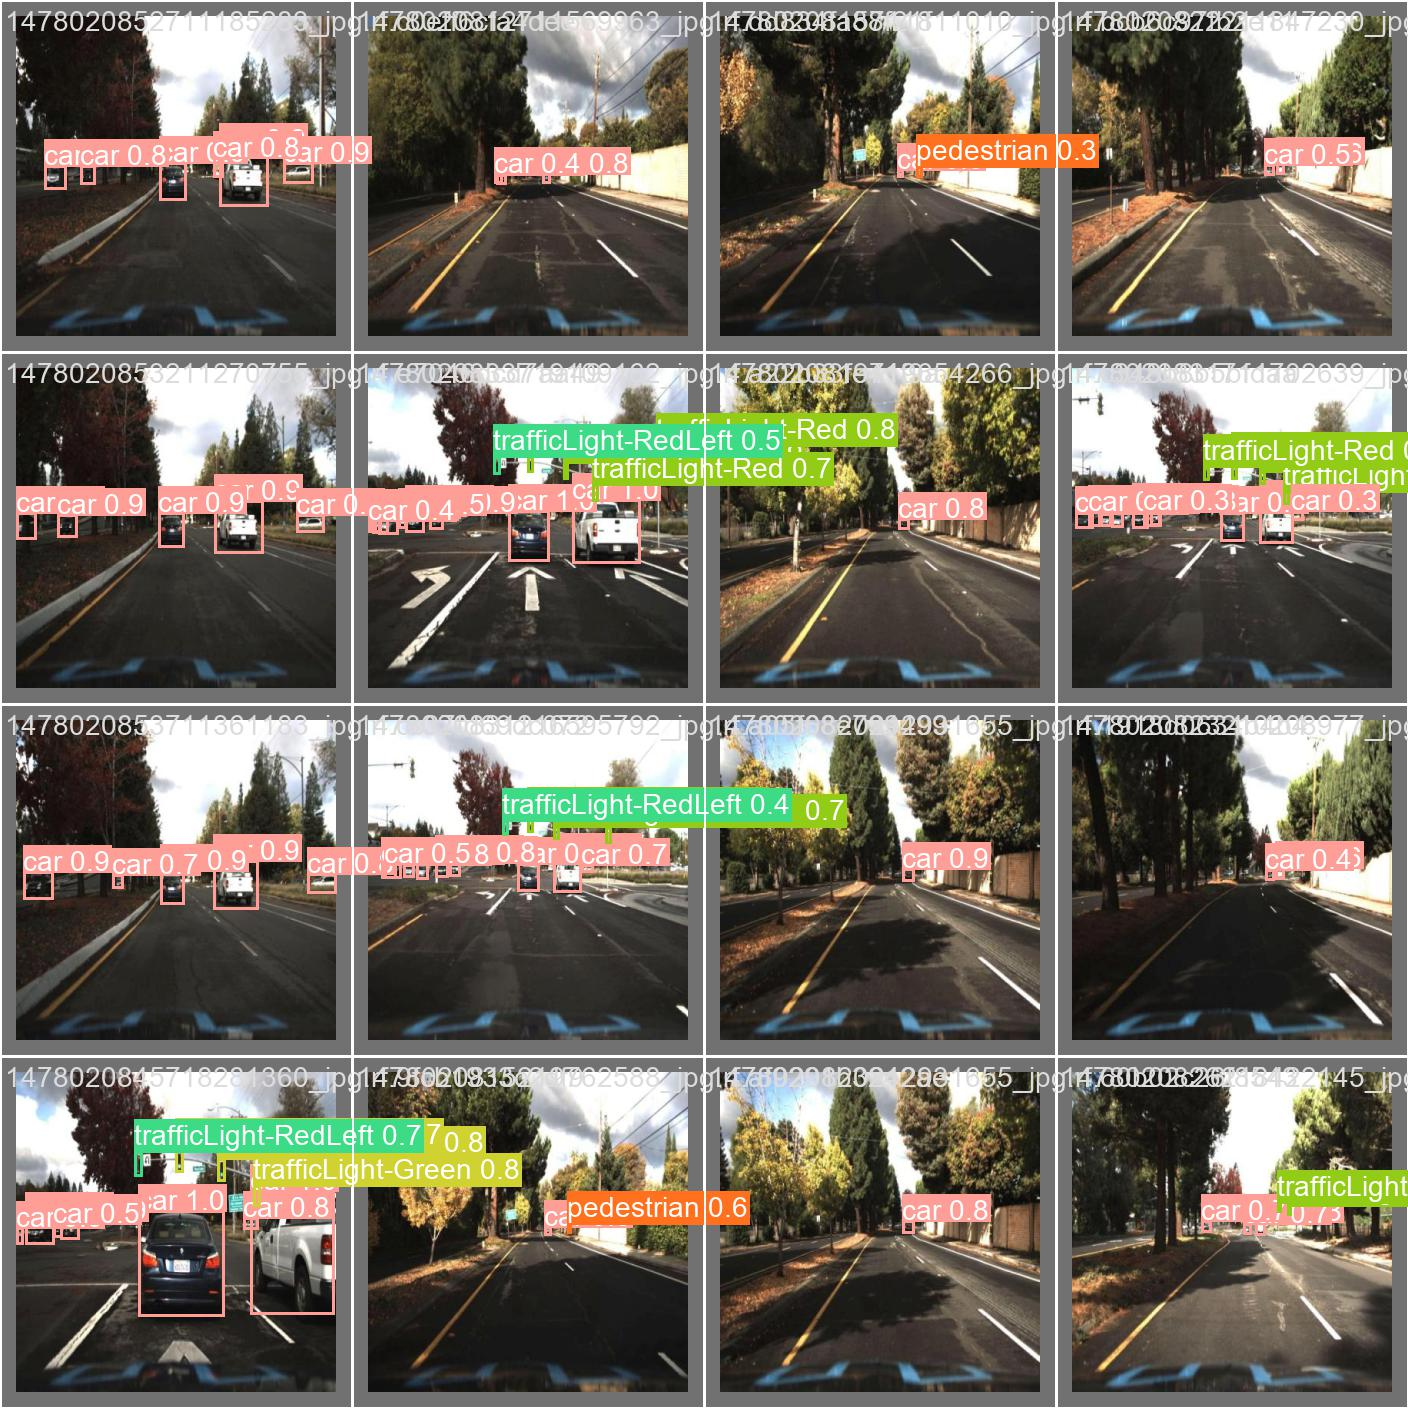

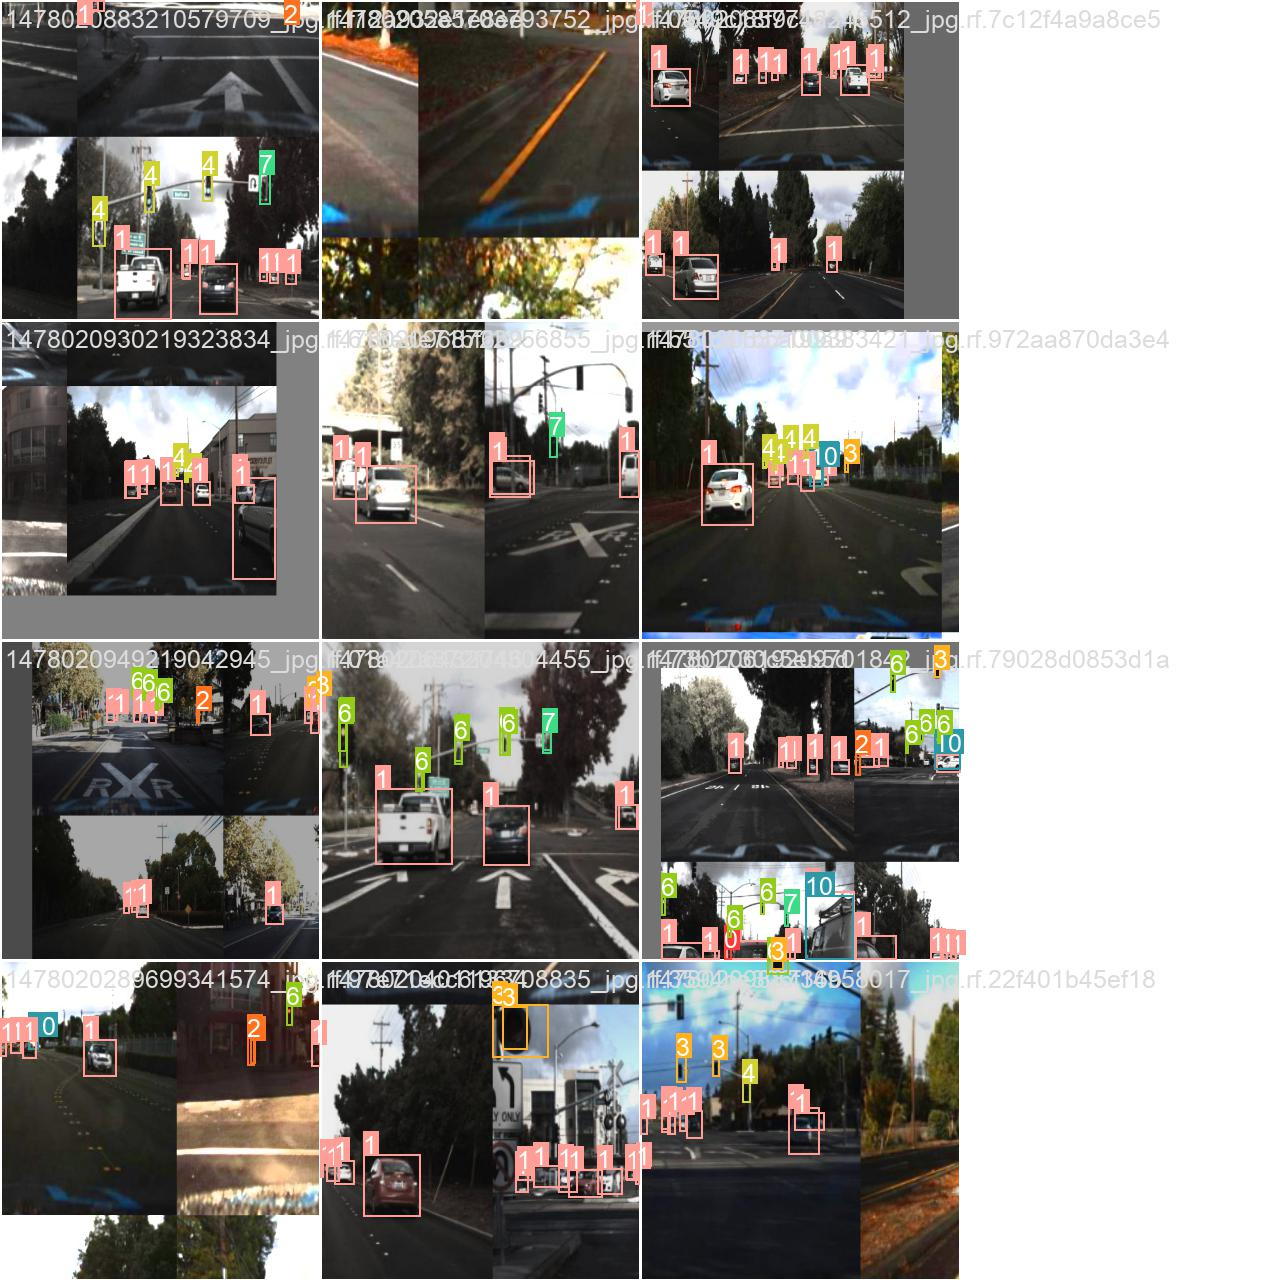

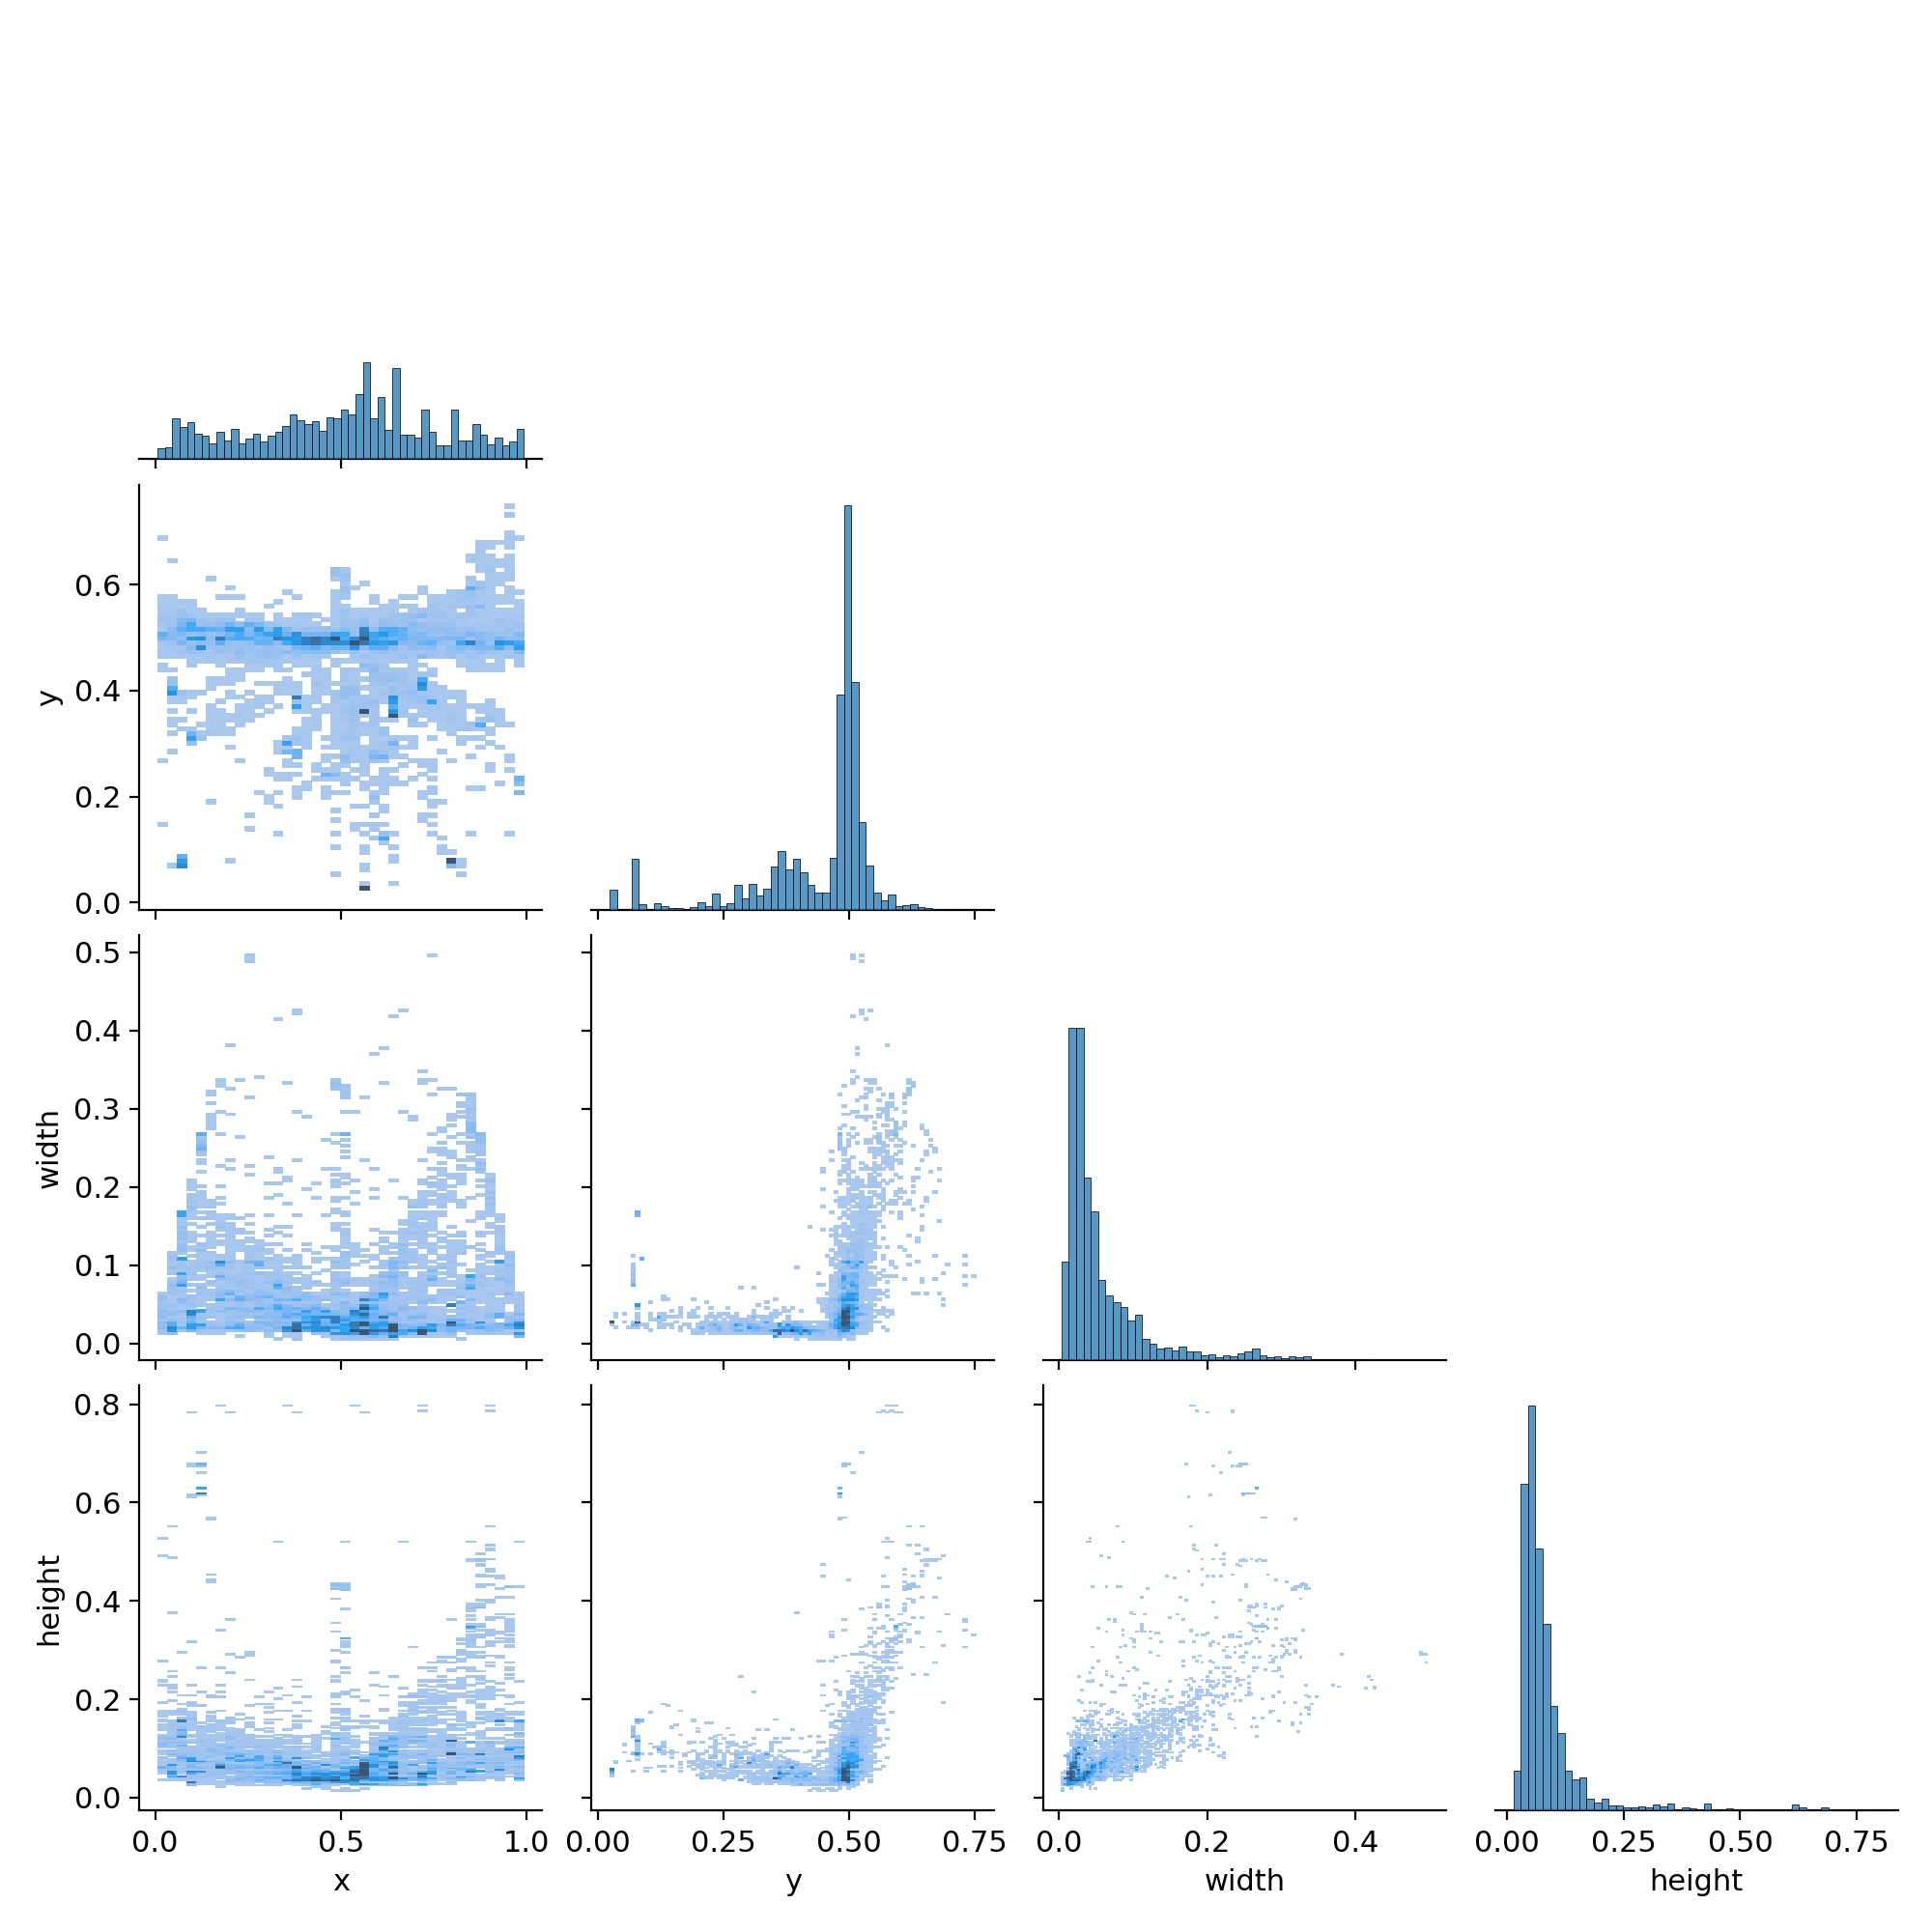

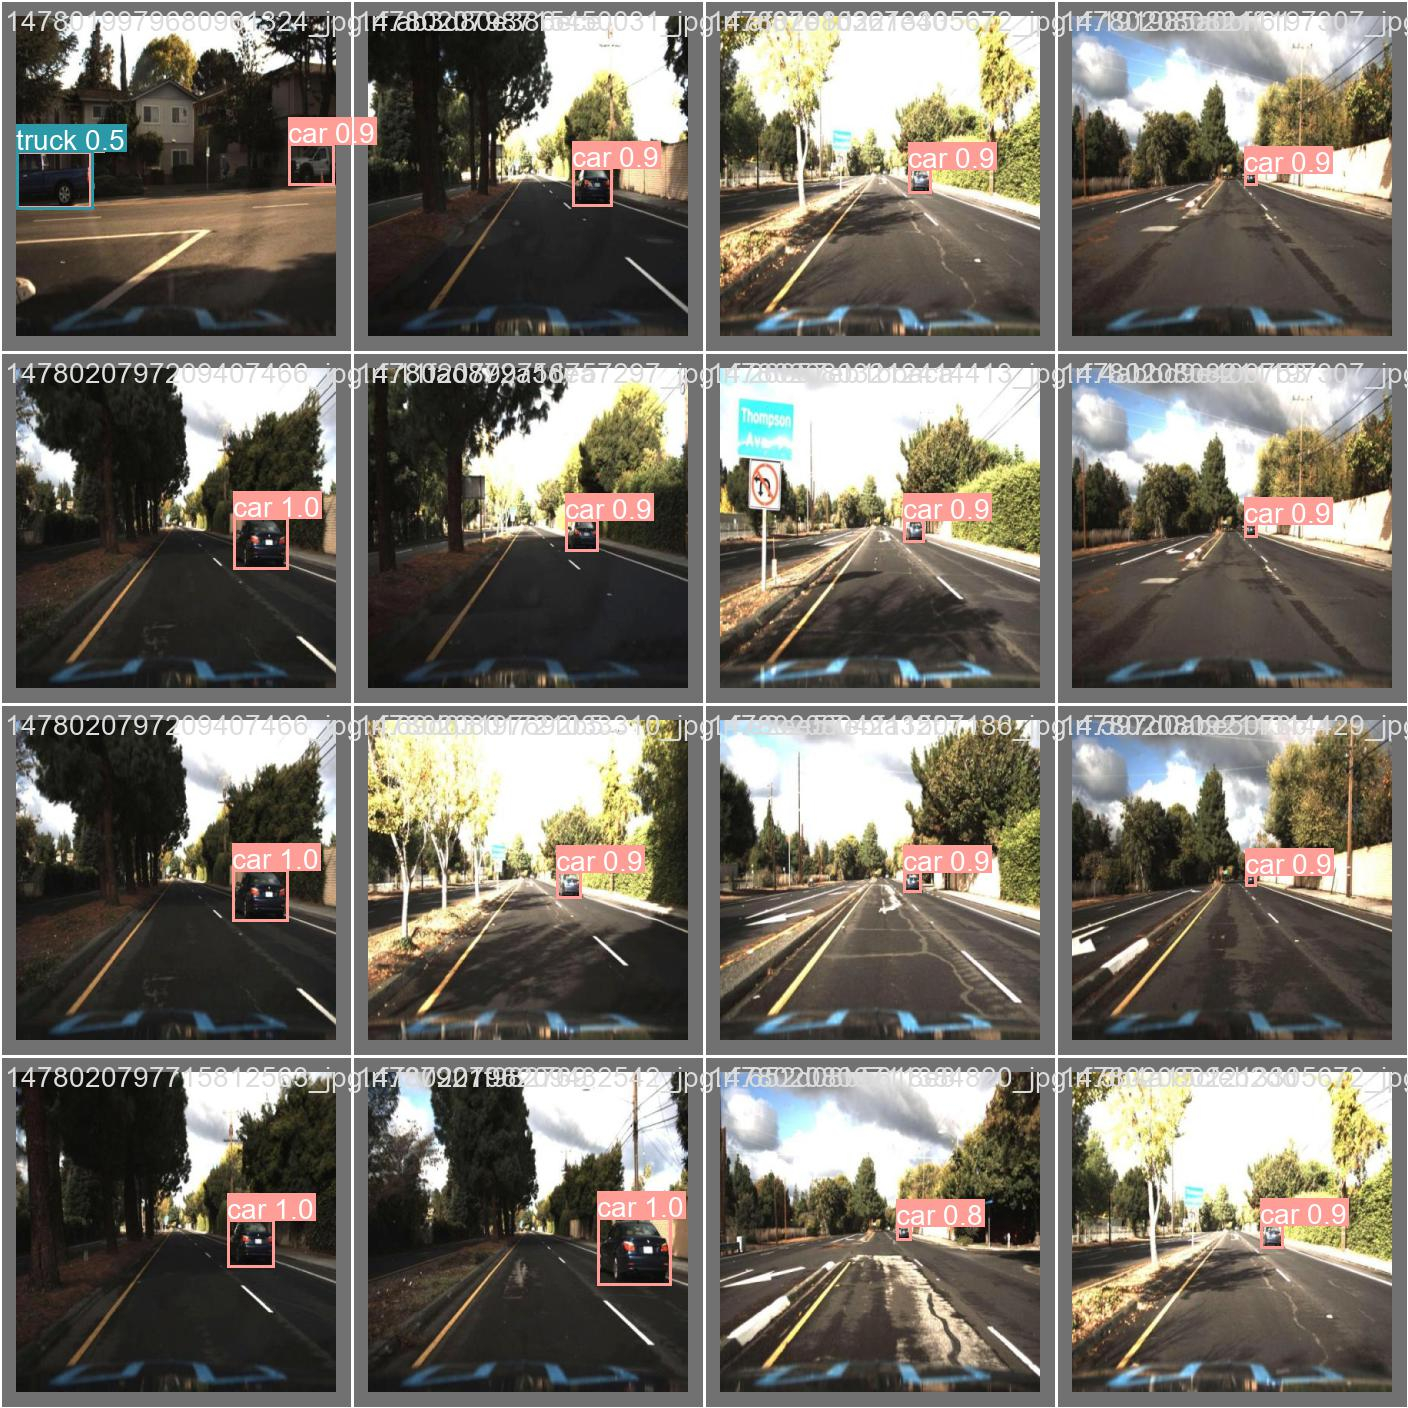

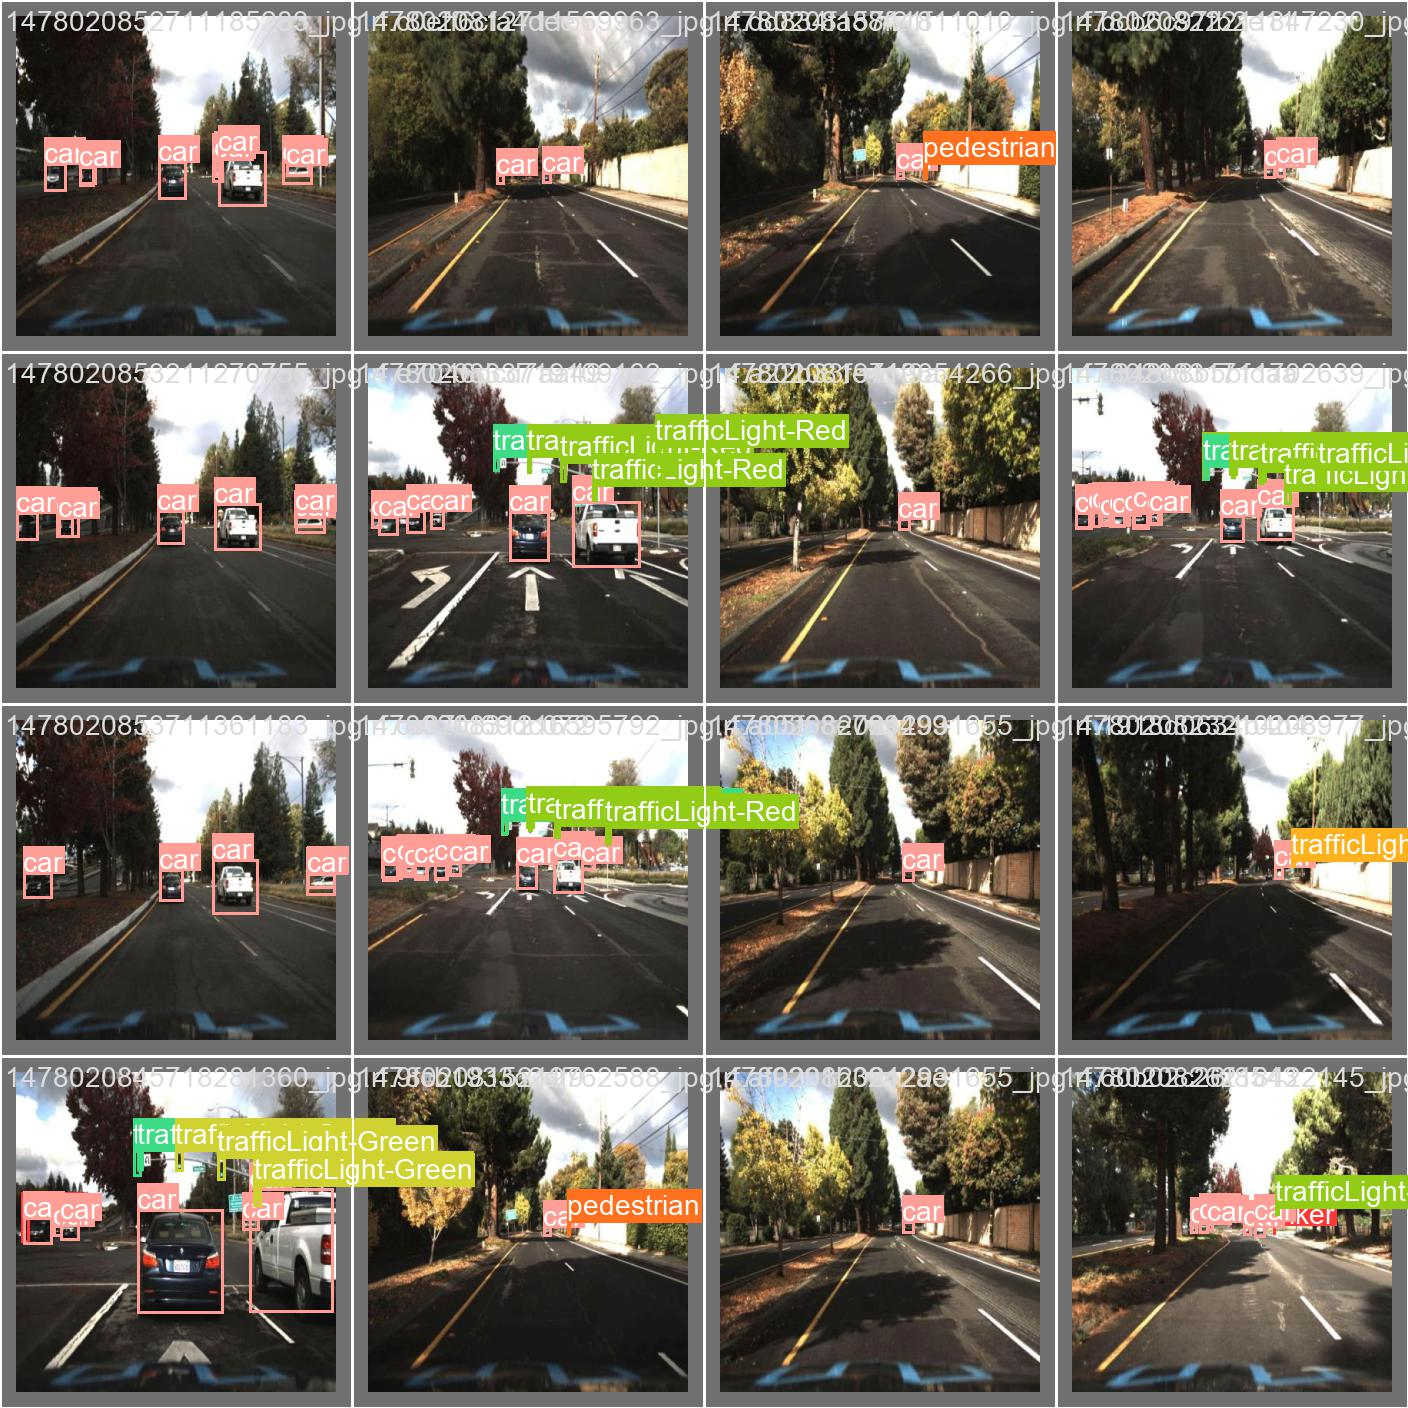

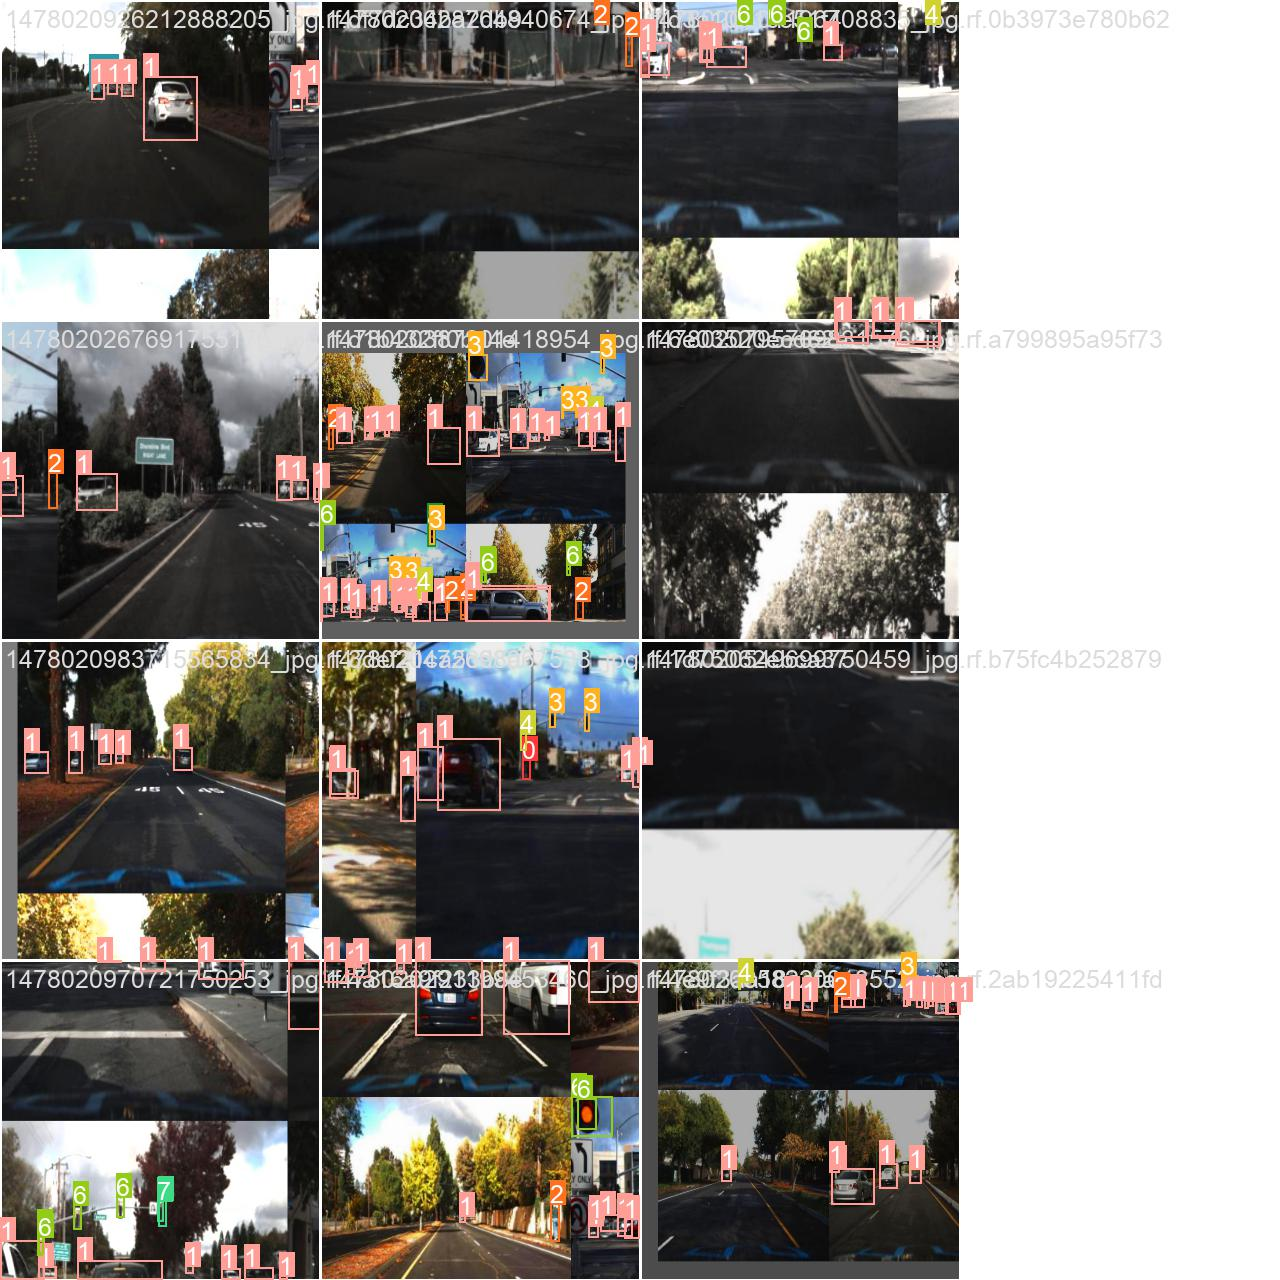

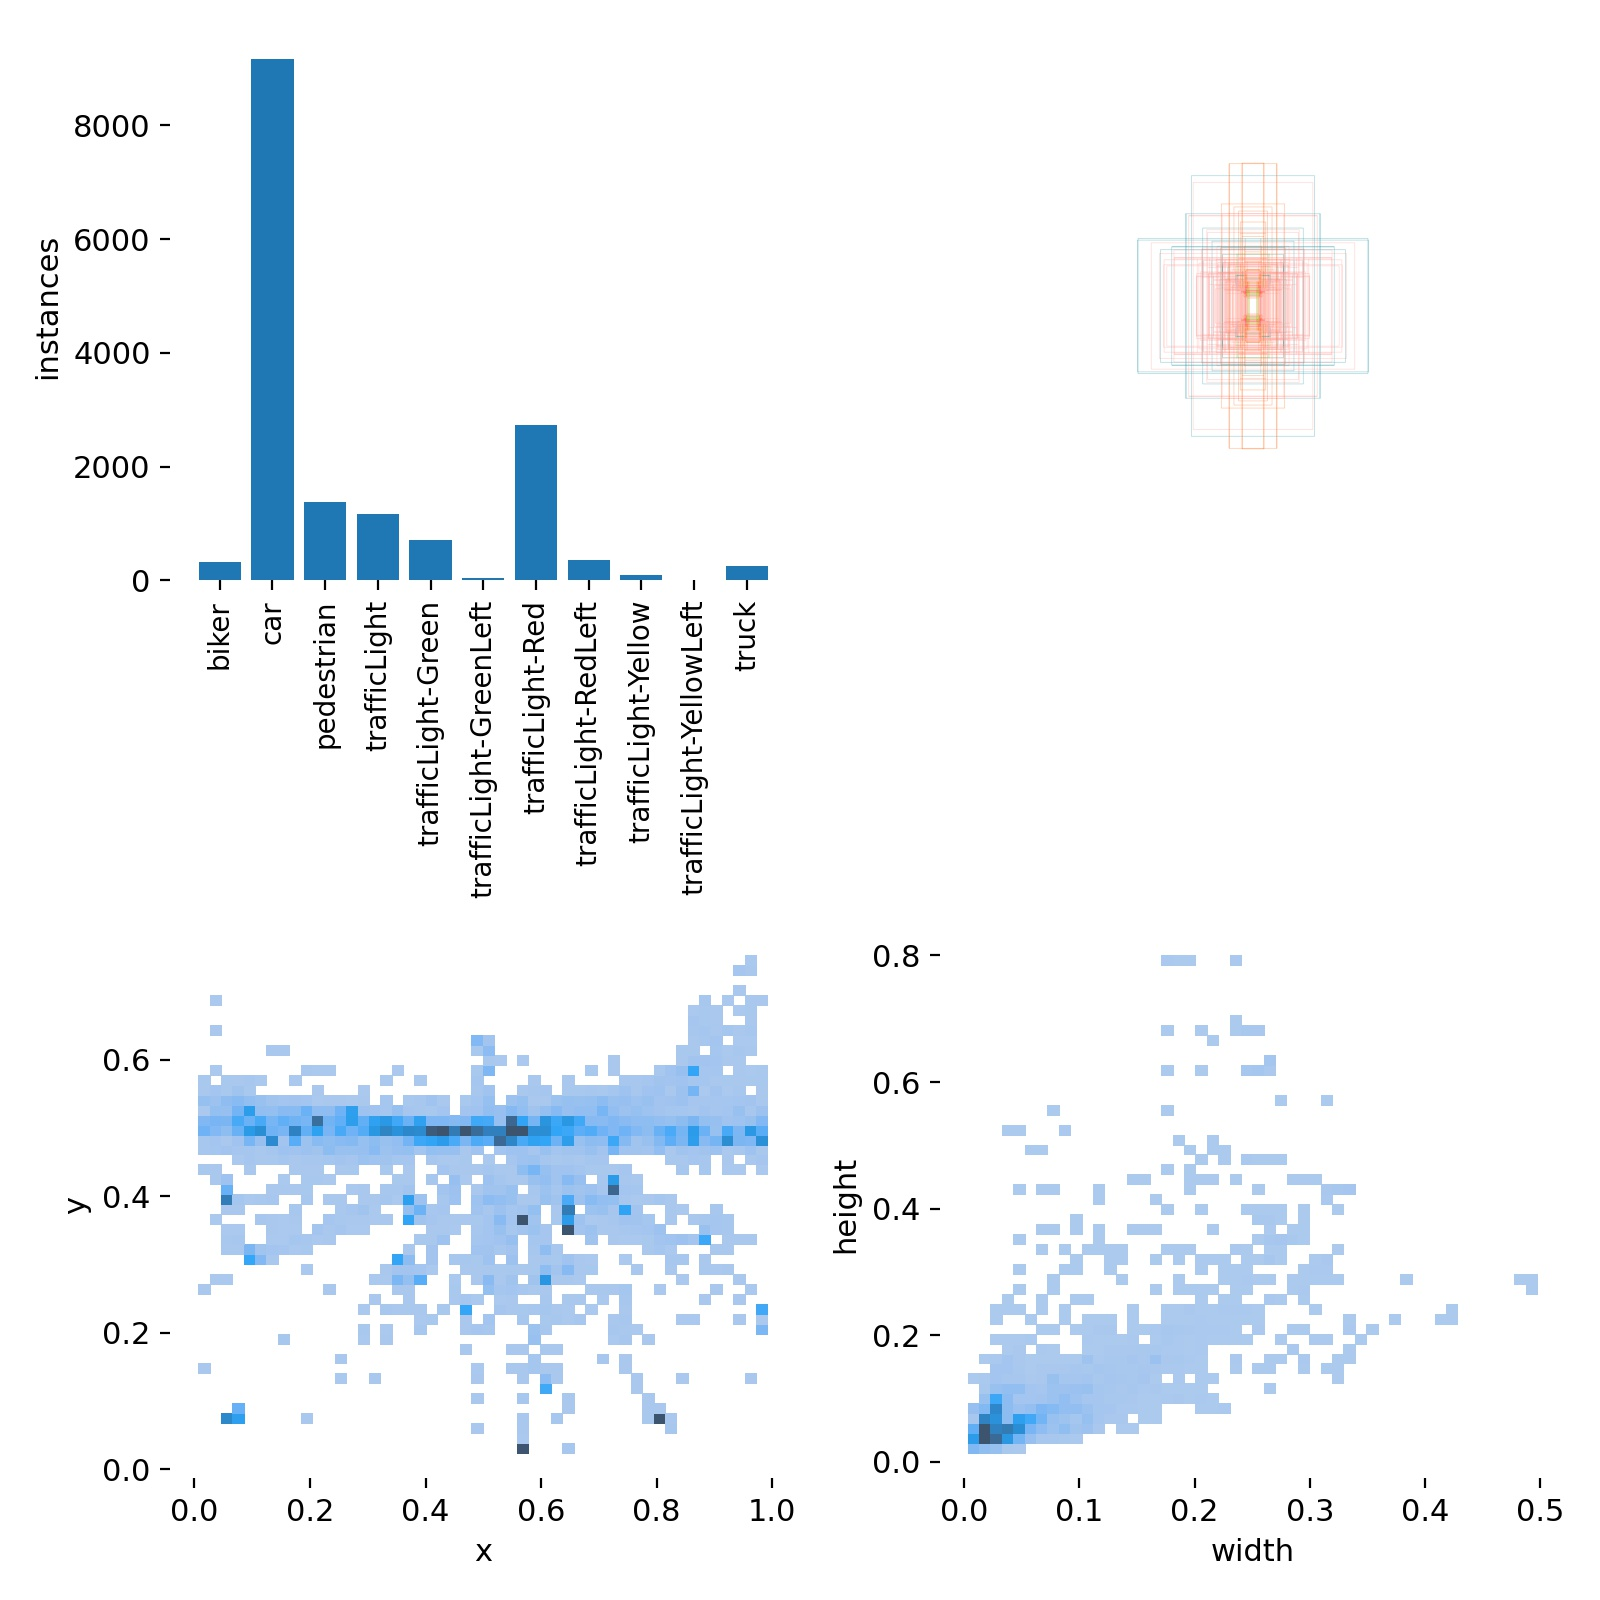

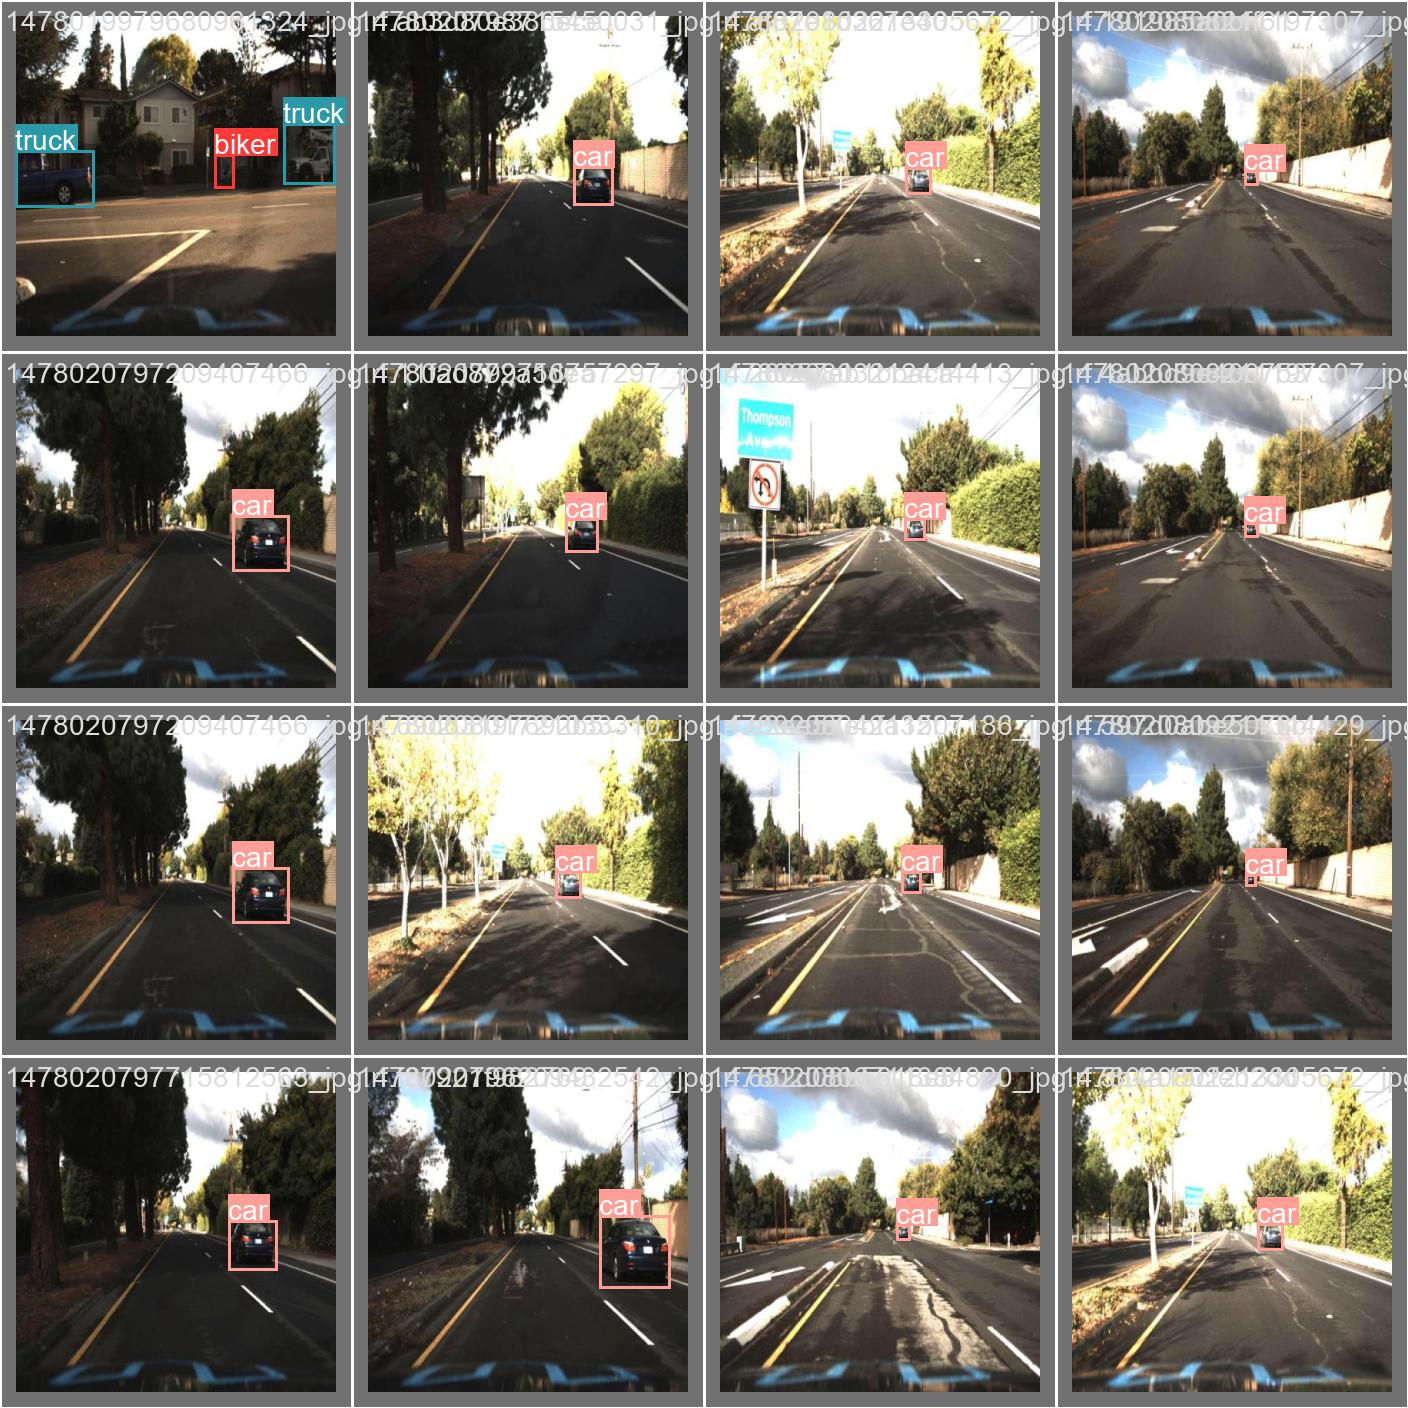

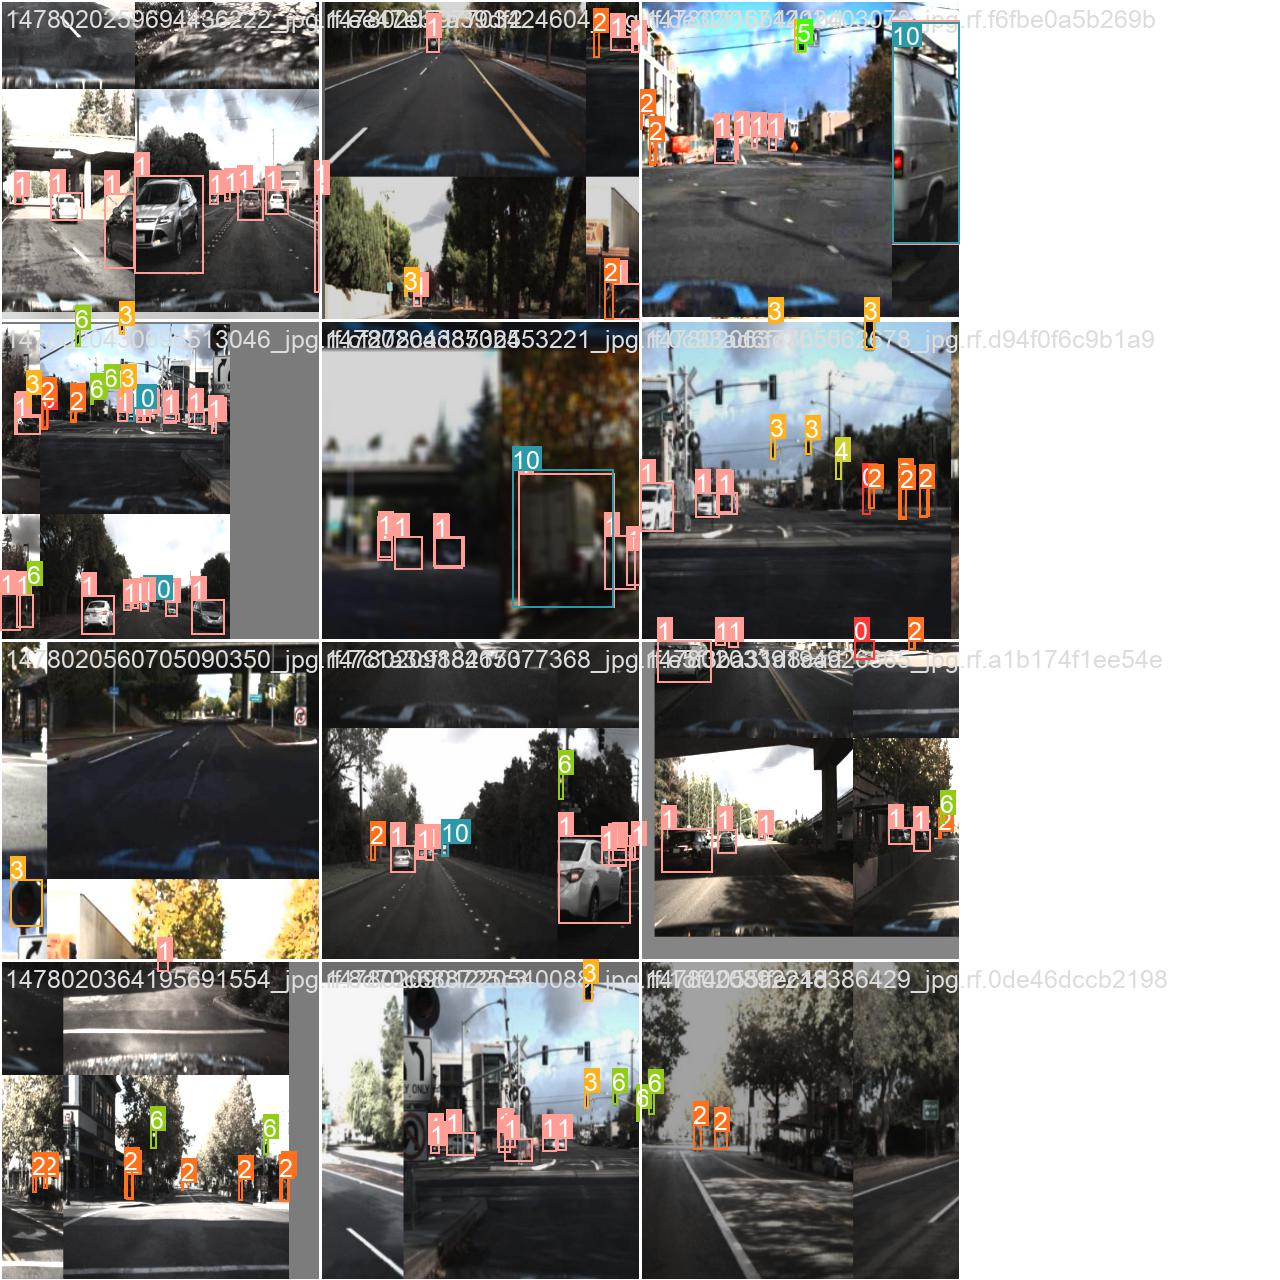

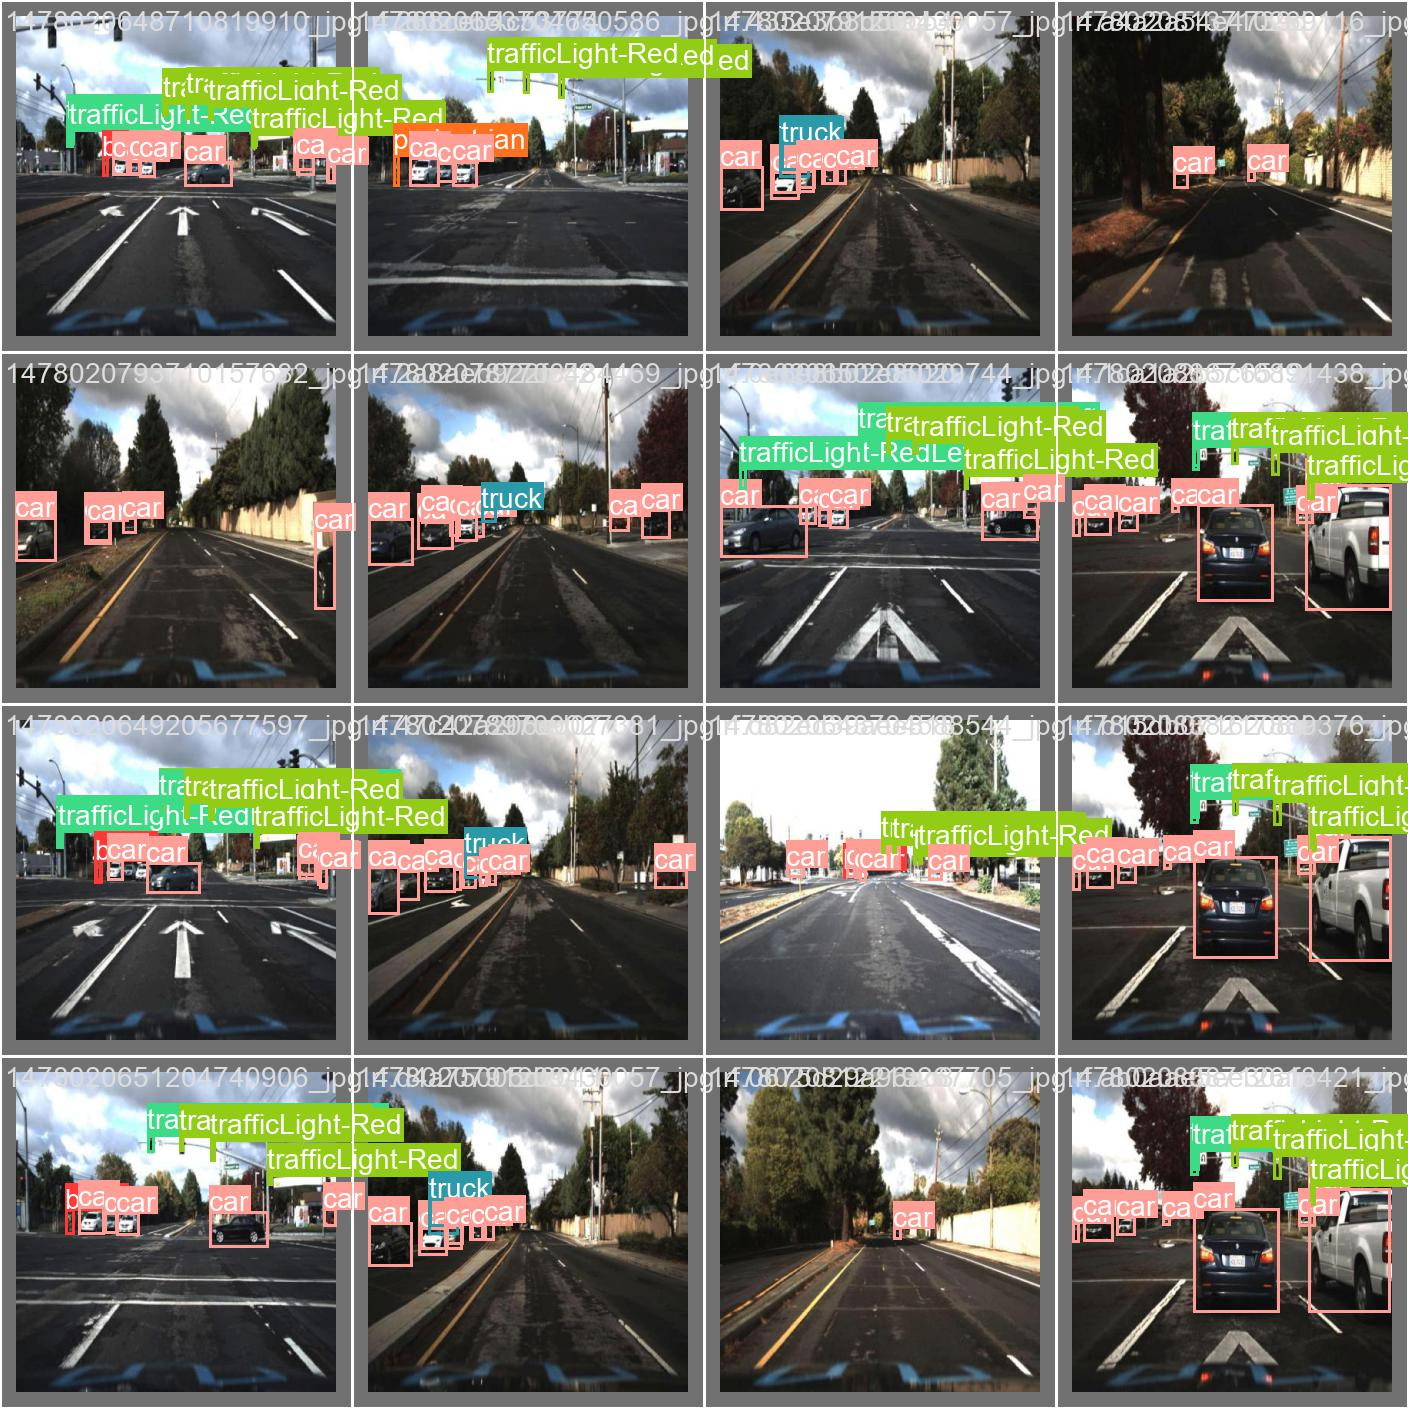

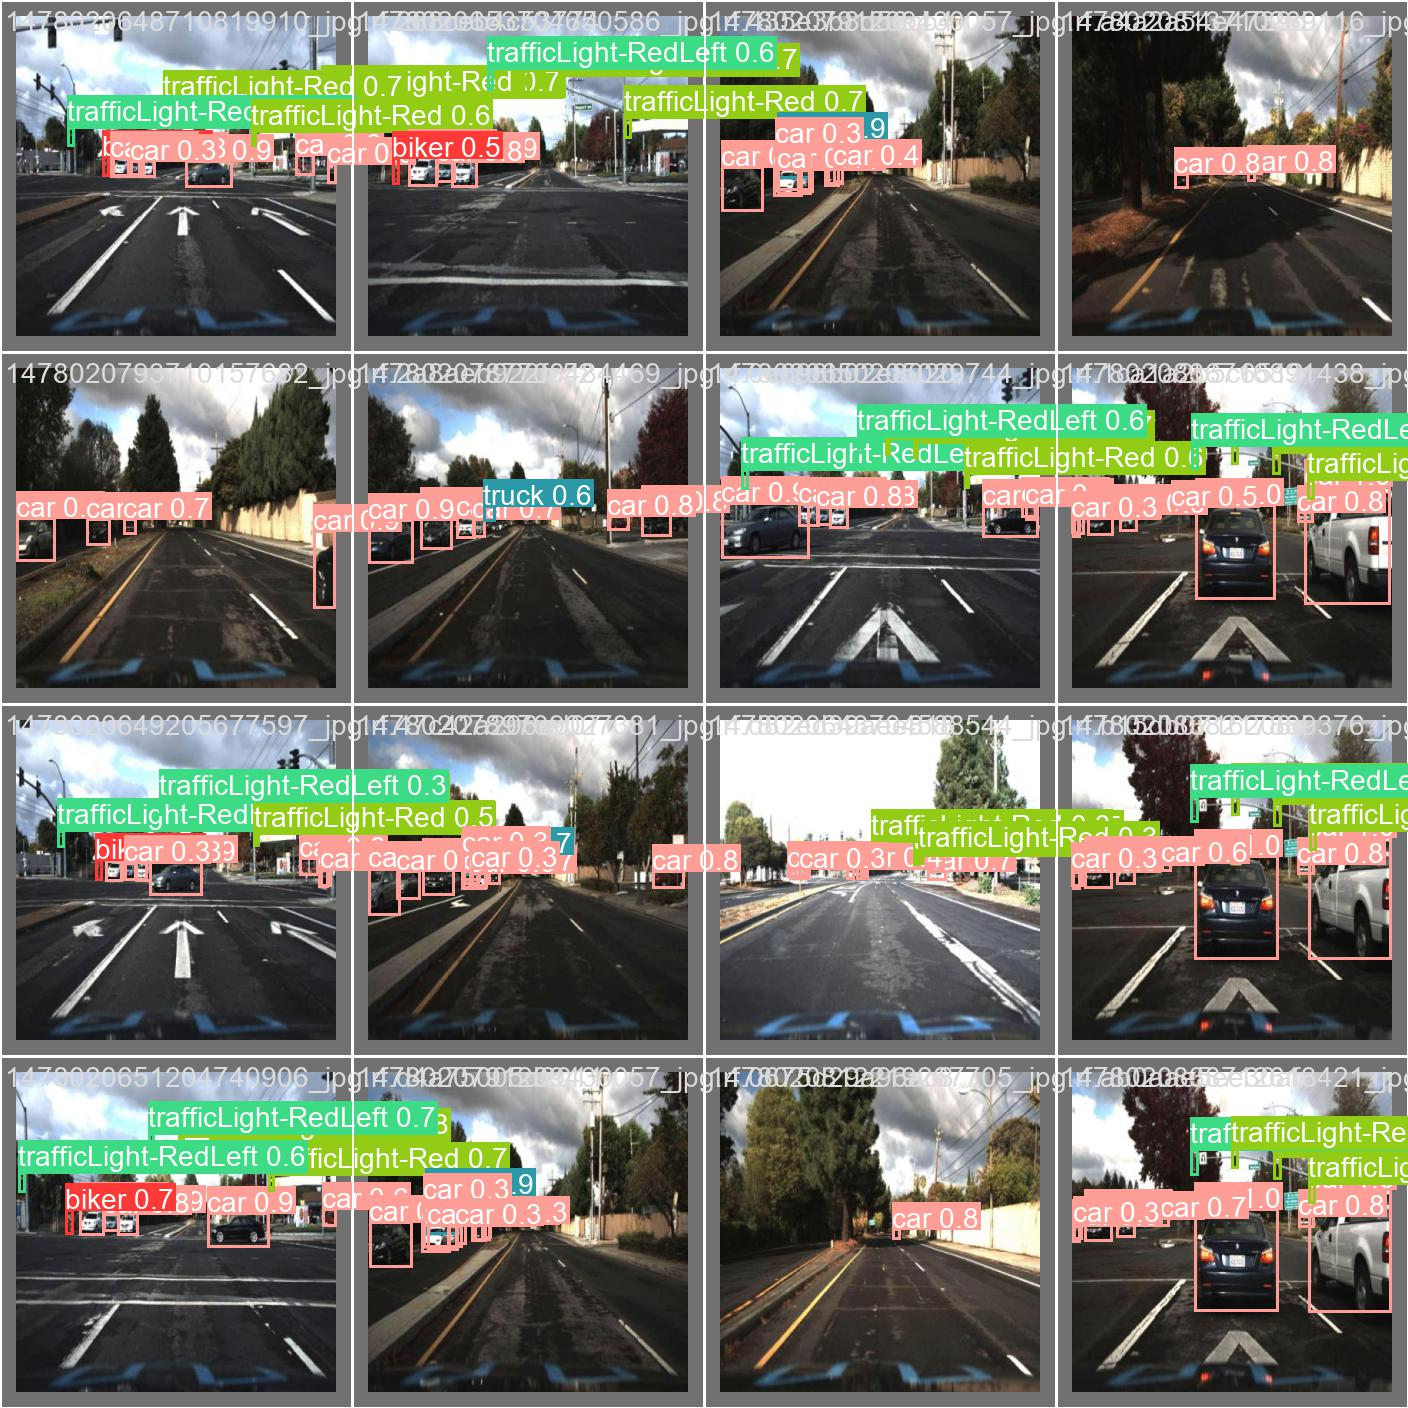

In [21]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/train/exp2/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [19]:
#export your model's weights for future use
from google.colab import files
files.download('/content/yolov5/runs/train/exp2/weights/best.pt')
#/content/yolov5/runs

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>